In [2]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("health.data.ny.gov", 
                "QQWlaoGFZYkDunsiGCH6mFvsO")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(health.data.ny.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
#results = client.get("u4ud-w55t", limit = 2000)

In [3]:
# list of unique dataset identifier from 2009-2017
lst_dataid = ["q6hk-esrj", "mtfm-rxf4", "pyhr-5eas", "u4ud-w55t", "npsr-cm47",
             "rmwa-zns4", "82xm-y6g8", "gnzp-ekau", "22g3-z7e7"]

In [4]:
get_annual_data = lambda x: pd.DataFrame.from_records(client.get(x, limit = 2000))

In [5]:
lst_result = [get_annual_data(data_id) for data_id in lst_dataid]
# Convert to pandas DataFrame
results_df = pd.concat(lst_result, sort = False)

In [6]:
import seaborn as sns
from eda import EDA
import matplotlib.pyplot as plt
results_df.columns

Index(['health_service_area', 'hospital_county',
       'operating_certificate_number', 'facility_id', 'facility_name',
       'age_group', 'gender', 'race', 'ethnicity', 'length_of_stay',
       'type_of_admission', 'patient_disposition', 'discharge_year',
       'ccs_diagnosis_code', 'ccs_diagnosis_description', 'ccs_procedure_code',
       'ccs_procedure_description', 'apr_drg_code', 'apr_drg_description',
       'apr_mdc_code', 'apr_mdc_description', 'apr_severity_of_illness_code',
       'apr_severity_of_illness_description', 'apr_risk_of_mortality',
       'apr_medical_surgical_description', 'source_of_payment_1',
       'source_of_payment_2', 'birth_weight', 'abortion_edit_indicator',
       'emergency_department_indicator', 'total_charges', 'total_costs',
       'source_of_payment_3', 'zip_code_3_digits', 'permanent_facility_id',
       'apr_severity_of_illness_descript', 'age', 'sex',
       'apr_drg_description_and_code', 'apr_severity_of_illness',
       'same_day_discharge_

In [7]:
results_df.head()

,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,gender,race,ethnicity,length_of_stay,...,age,sex,apr_drg_description_and_code,apr_severity_of_illness,same_day_discharge_indicator,hospital_service_area,payment_typology_1,payment_typology_2,payment_typology_3,apr_medical_surgical
0,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,0 to 17,F,White,Not Span/Hispanic,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,18 to 29,M,White,Not Span/Hispanic,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,18 to 29,F,White,Not Span/Hispanic,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,50 to 69,M,White,Not Span/Hispanic,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,70 or Older,M,White,Not Span/Hispanic,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#convert charges and costs into numeric
numeric_cols = ['total_charges','total_costs', 'length_of_stay']
results_df[numeric_cols ] = results_df[numeric_cols ].apply(pd.to_numeric, errors='coerce')
categorical_cols = ['gender','race','ethnicity','type_of_admission']
results_df[categorical_cols] = results_df[categorical_cols].astype('category')

In [9]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18000 entries, 0 to 1999
Data columns (total 46 columns):
health_service_area                    9976 non-null object
hospital_county                        17942 non-null object
operating_certificate_number           17942 non-null object
facility_id                            9965 non-null object
facility_name                          18000 non-null object
age_group                              16000 non-null object
gender                                 16000 non-null category
race                                   18000 non-null category
ethnicity                              18000 non-null category
length_of_stay                         17990 non-null float64
type_of_admission                      18000 non-null category
patient_disposition                    18000 non-null object
discharge_year                         18000 non-null object
ccs_diagnosis_code                     17973 non-null object
ccs_diagnosis_description      

In [10]:
results_df.describe()

,length_of_stay,total_charges,total_costs
count,17990.000000,1.800000e+04,18000.000000
mean,4.549138,2.577404e+04,10537.669219
std,7.204239,5.924399e+04,18227.703005
min,1.000000,1.350000e+02,34.410000
25%,2.000000,5.255188e+03,2465.025000
50%,3.000000,1.034812e+04,5175.685000
75%,5.000000,2.379153e+04,11277.652500
max,118.000000,1.294606e+06,378528.650000


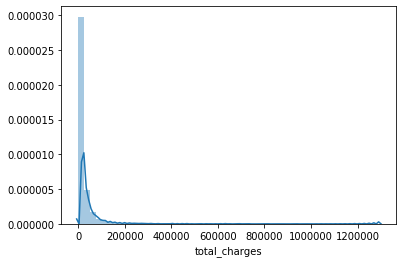

In [11]:
sns.distplot(results_df['total_charges'])

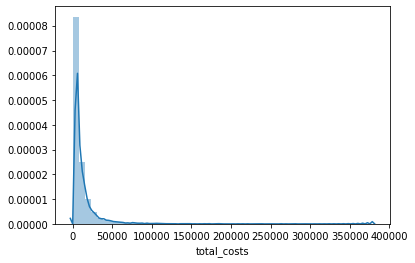

In [12]:
sns.distplot(results_df['total_costs'])

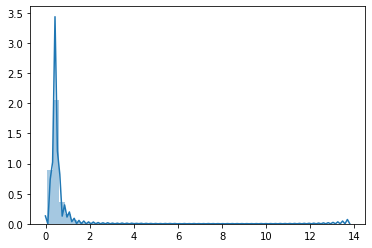

In [13]:
sns.distplot(results_df['total_costs'] / results_df['total_charges'])

In [14]:
results_df[['age_group','gender','race','length_of_stay','total_charges','total_costs']].corr()

,length_of_stay,total_charges,total_costs
length_of_stay,1.000000,0.822265,0.713893
total_charges,0.822265,1.000000,0.852471
total_costs,0.713893,0.852471,1.000000


Preview of data:


,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,gender,race,ethnicity,length_of_stay,...,age,sex,apr_drg_description_and_code,apr_severity_of_illness,same_day_discharge_indicator,hospital_service_area,payment_typology_1,payment_typology_2,payment_typology_3,apr_medical_surgical
0,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,0 to 17,F,White,Not Span/Hispanic,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,18 to 29,M,White,Not Span/Hispanic,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,18 to 29,F,White,Not Span/Hispanic,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18000 entries, 0 to 1999
Data columns (total 46 columns):
health_service_area                    9976 non-null object
hospital_county                        17942 non-null object
operating_certificate_number           17942 non-null object
facility_id                            9965 non-null object
facility_name                          18000 non-null object
age_group                              16000 non-null object
gender                                 16000 non-null category
race                                   18000 non-null category
ethnicity                              18000 non-null category
length_of_stay                         17990 non-null float64
type_of_admission                      18000 non-null category
patient_disposition                    18000 non-null object
discharge_year                         18000 non-null object
ccs_diagn

,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,gender,race,ethnicity,length_of_stay,...,age,sex,apr_drg_description_and_code,apr_severity_of_illness,same_day_discharge_indicator,hospital_service_area,payment_typology_1,payment_typology_2,payment_typology_3,apr_medical_surgical
0,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,0 to 17,F,White,Not Span/Hispanic,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,18 to 29,M,White,Not Span/Hispanic,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,18 to 29,F,White,Not Span/Hispanic,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


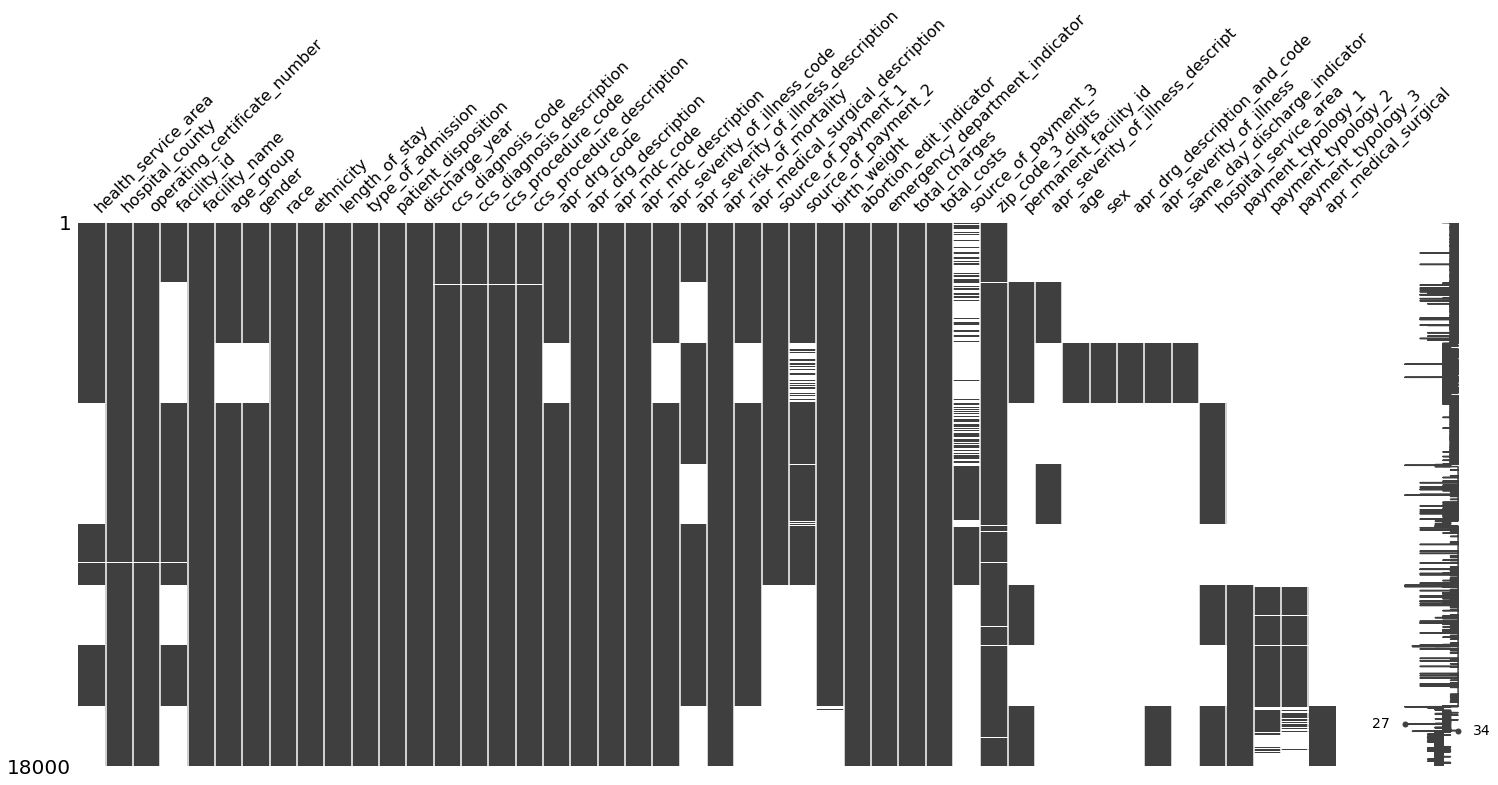


***Number of duplicated entries:  30


,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,gender,race,ethnicity,length_of_stay,...,age,sex,apr_drg_description_and_code,apr_severity_of_illness,same_day_discharge_indicator,hospital_service_area,payment_typology_1,payment_typology_2,payment_typology_3,apr_medical_surgical
1389,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,0 to 17,F,White,Not Span/Hispanic,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,0 to 17,F,White,Not Span/Hispanic,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1344,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,0 to 17,F,White,Not Span/Hispanic,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1416,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,0 to 17,F,White,Not Span/Hispanic,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1369,Capital/Adiron,Albany,0101000,1,Albany Medical Center Hospital,0 to 17,F,White,Not Span/Hispanic,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



To check: 
Unique count of non-numeric data

health_service_area                      2
hospital_county                         12
operating_certificate_number            17
facility_id                              6
facility_name                           23
age_group                                5
gender                                   2
race                                     5
ethnicity                                4
type_of_admission                        6
patient_disposition                     18
discharge_year                           9
ccs_diagnosis_code                     285
ccs_diagnosis_description              455
ccs_procedure_code                     230
ccs_procedure_description              198
apr_drg_code                           321
apr_drg_description                    568
apr_mdc_code                            33
apr_mdc_description                     25
apr_severity_of_illness_code             4
apr_severity_of_illness_description      4
apr_risk

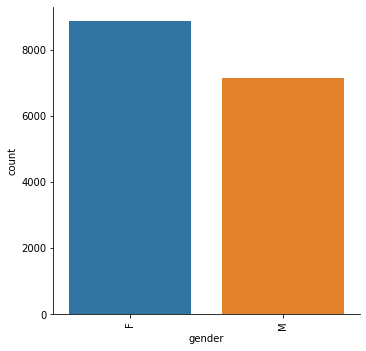

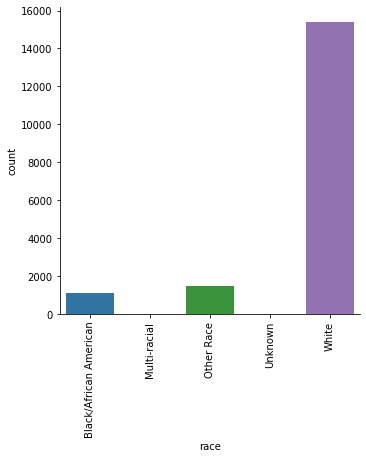

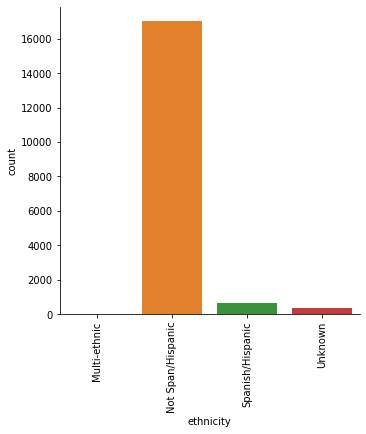

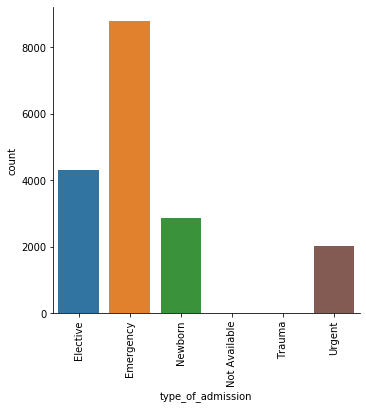


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
length_of_stay,17990.0,4.549138,7.204239,1.00,2.0000,3.000,5.0000,118.00
total_charges,18000.0,25774.038926,59243.985407,135.00,5255.1875,10348.125,23791.5325,1294606.32
total_costs,18000.0,10537.669219,18227.703005,34.41,2465.0250,5175.685,11277.6525,378528.65


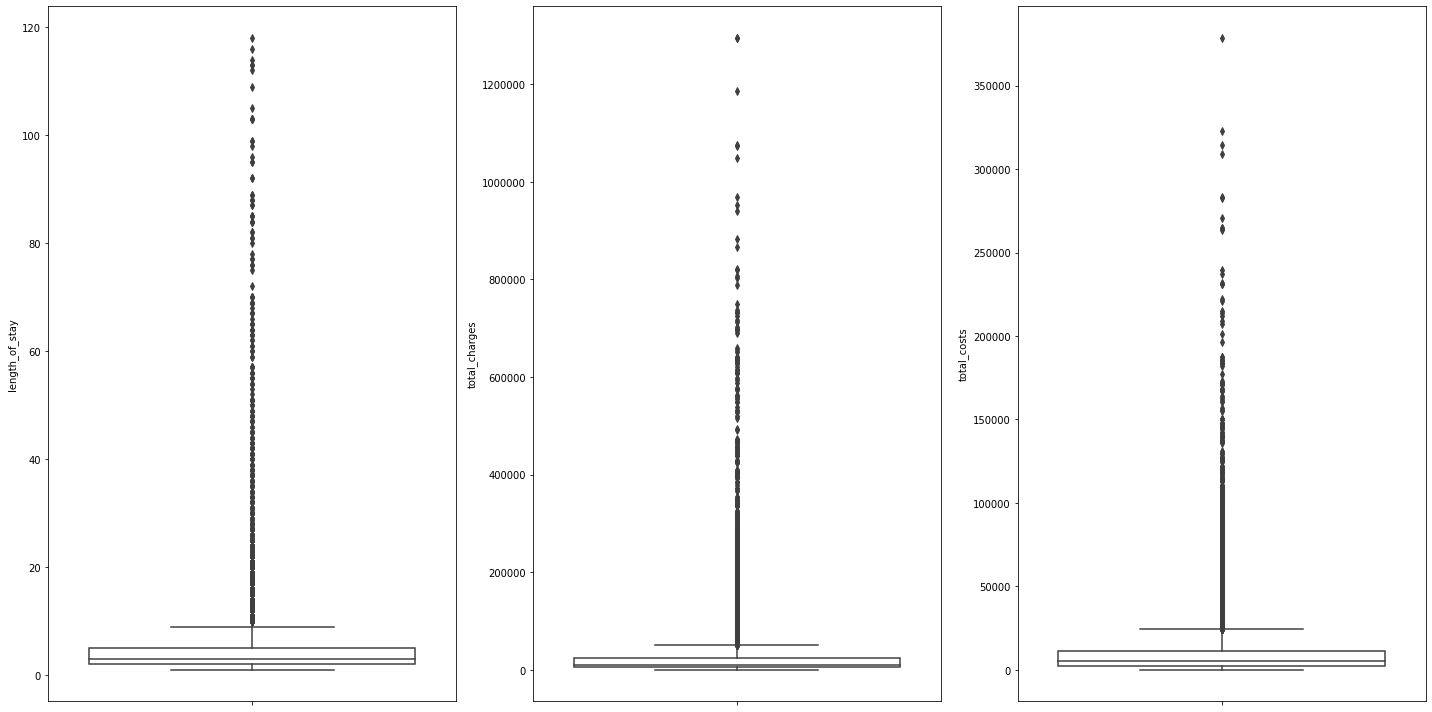

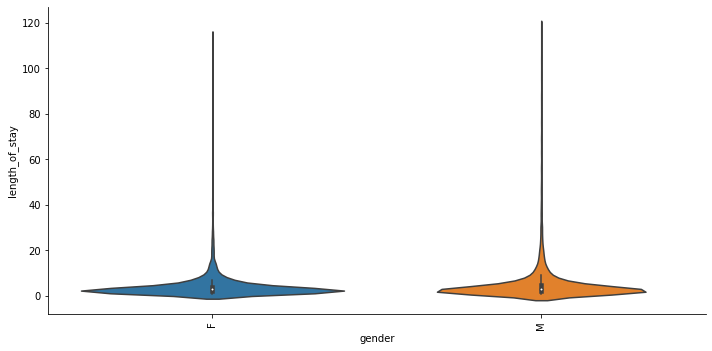

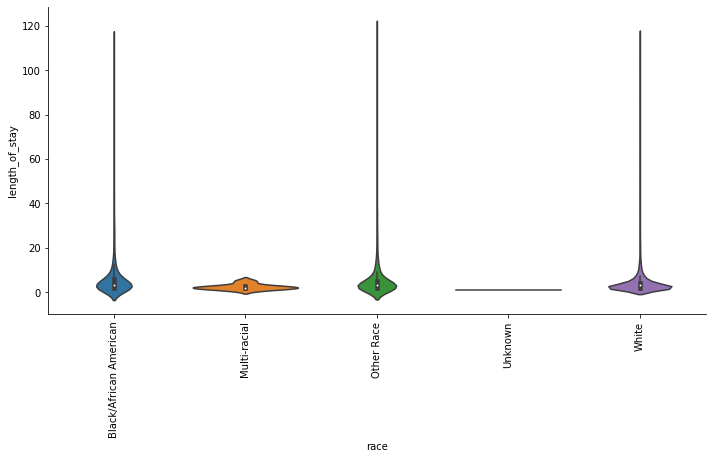

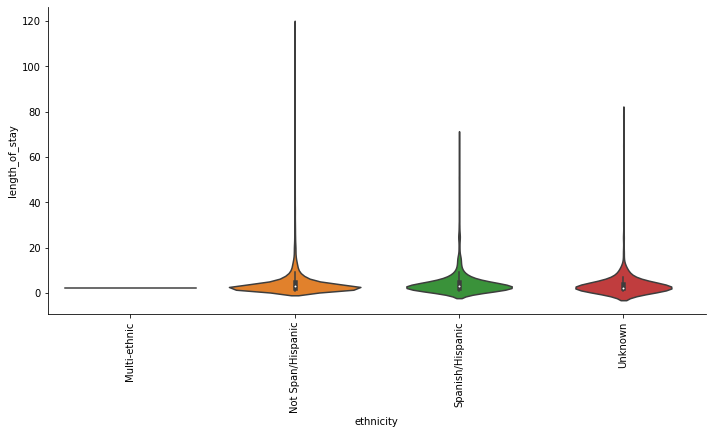

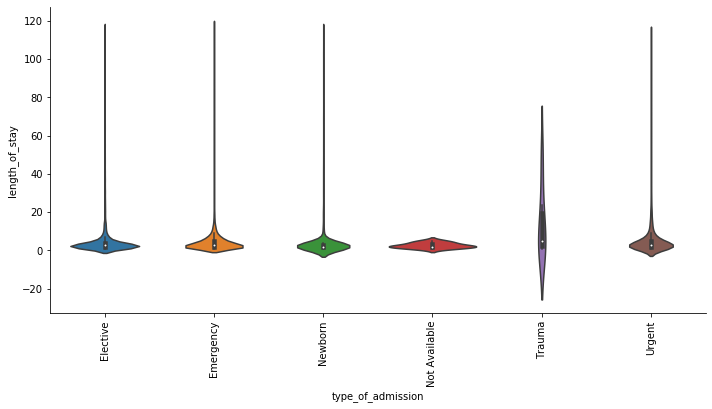

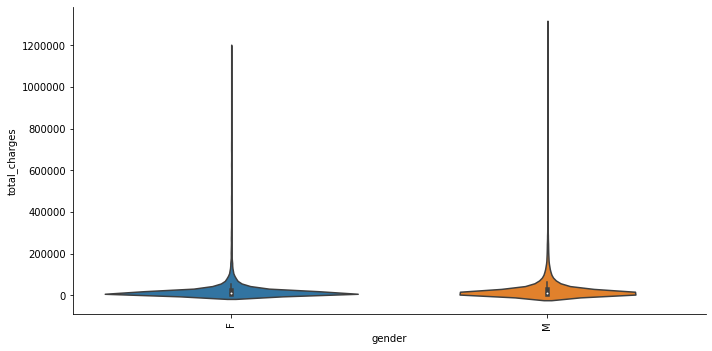

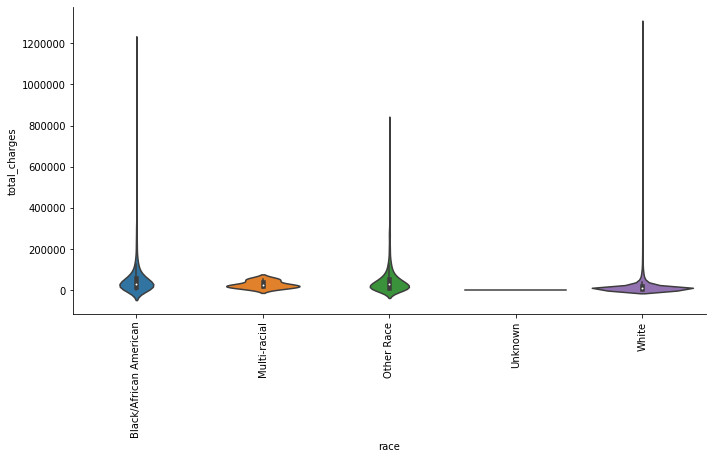

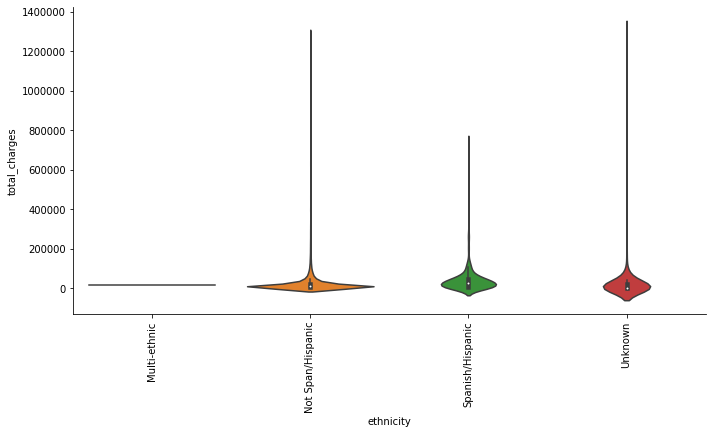

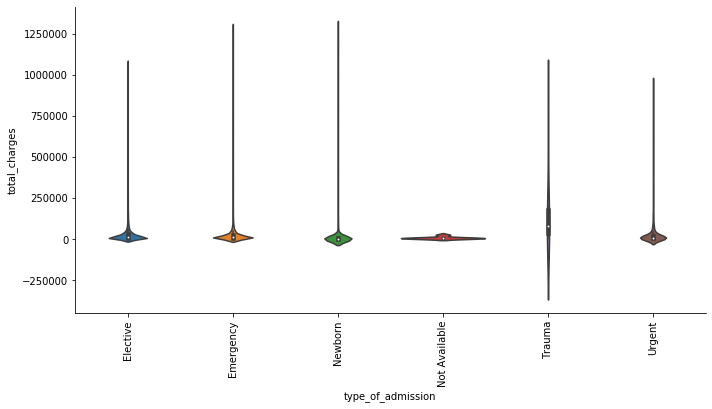

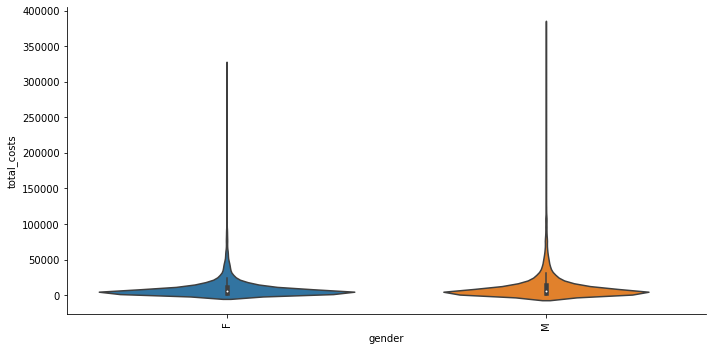

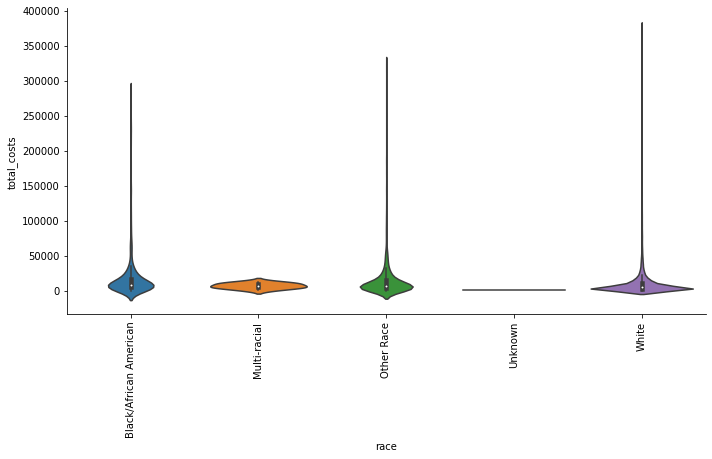

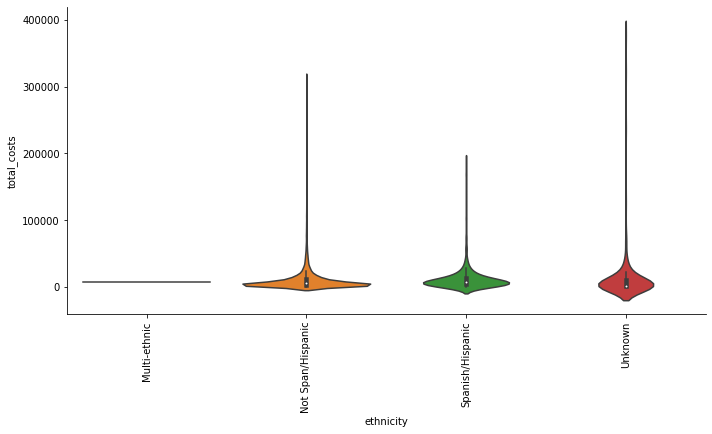

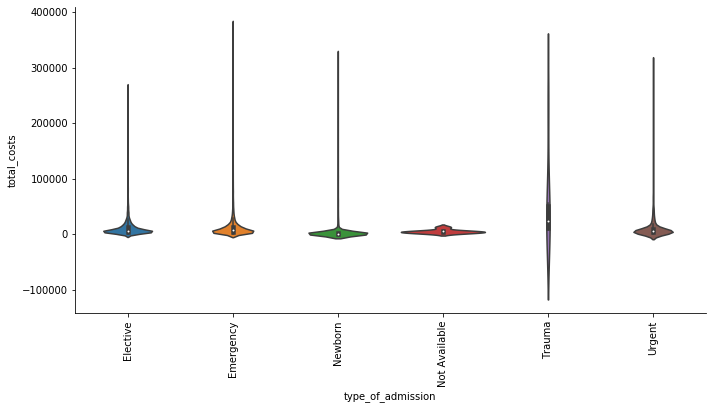


To check pairwise joint distribution of numeric data


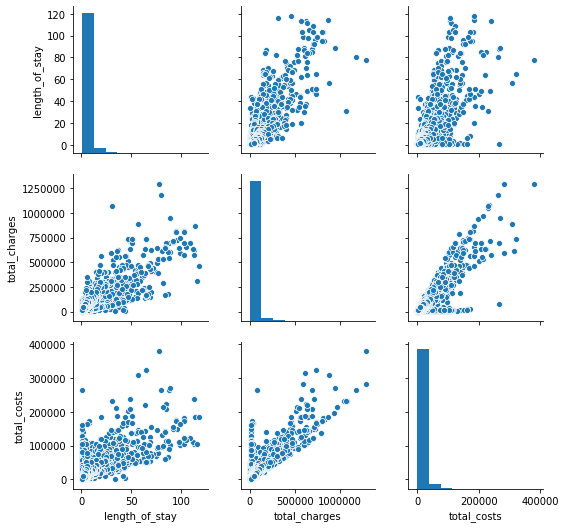


To check time series of numeric data  by daily, monthly and yearly frequency


In [15]:
EDA(results_df)